# Demo 1:  AutoRegressive (AR) model
In this demo, we will still working with data car stock as the same in Demo 0
-   In this demo we will use statsmodels package

# Task 1: Read data

In [2]:
import pandas as pd

In [3]:
# Read csv data:
file_path = "/Users/user/AI_Class/Supervised/Regression/data_car_stock/BMW.DE.csv"
df_BMW = pd.read_csv(file_path) # read csv file to dataframe in pandas package

# Task 2: Autoregression models for Close time series data.
Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.
In this task, we will discover how to implement an autoregressive model for time series forecasting with Python:
-   How to explore time series data for autocorrelation.
-   How to create an autocorrelation model and use it to make predictions
-   How to use a created auto correlation model to make rolling predictions.

## Task 2.1: Check for Autocorrelation
-   Pandas provides a built-in plot called the <span style ="color:yellow"> autocorrelation_plot()</span> function.
-   The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more signigicant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

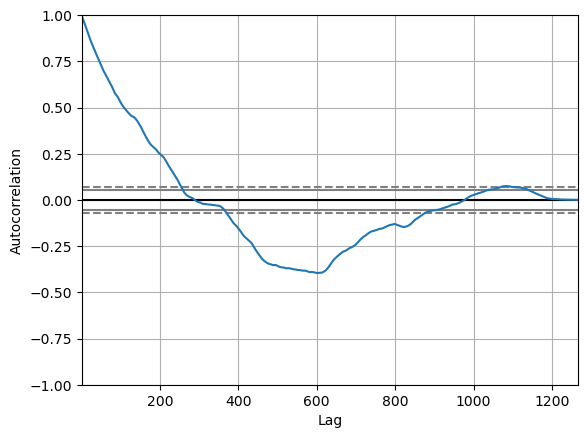

In [4]:
from matplotlib import pyplot as plt
# Plot auto correlation depends on lag
auto_corr_Close = pd.plotting.autocorrelation_plot(df_BMW["Close"])
auto_corr_Close.plot()
plt.show()

The statsmodels library also provides a version of the plot in the <span style="color:yellow"> plot_acf()</span> function as a line plot.

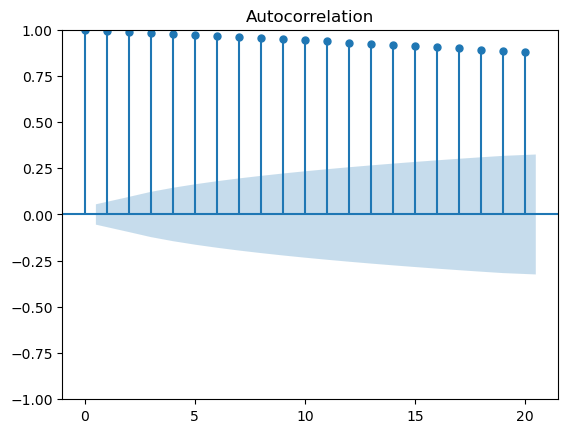

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_BMW["Close"],lags=20,alpha = 0.05) 
# Default alpha is 0.05, plots the 95% confidence intervals.
plt.show()

## Task 2.2: How to create an autoregression model

In this task we will create an autoregression model and fitting for the model
-   We will use first 1000 items (item 0 to item 999) as our train dataset the other items we will use as our test dataset
-   Predict and evaluate results

### Remind what is the problem in here
Try to predict close value in future:
Model form:  y/output = f(x/input), where y/output is the close value, x/input is time at that we want to compute the close value.
-   Take a look at slide of AutoRegression model of lecture ppt to consider the function form of AutoRegression function (hyperparameters (is its p/lags?), trainable parameters ($\alpha, \phi _1,\phi _2,....,\phi _p,\varepsilon $ ?))

In [8]:
# import package
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [10]:
# Prepare data for model
y_train = df_BMW["Close"][:1000]
y_test = df_BMW["Close"][1000:]
print(len(y_test))

266


In [36]:
# Create an autoregression model
temp_model = AutoReg(y_train,lags=310)
trained_model = temp_model.fit()

In [37]:
# Obtain value of parameters after training/fitting
print("Coefficients:", trained_model.params)

Coefficients: const        -0.839455
Close.L1      1.080731
Close.L2     -0.123045
Close.L3      0.117044
Close.L4     -0.149271
                ...   
Close.L306   -0.113091
Close.L307    0.138061
Close.L308   -0.143526
Close.L309    0.040595
Close.L310    0.025469
Length: 311, dtype: float64


In [38]:
# Use trained/fitted model to predict close value on last 266 times (test times)
y_pred = trained_model.predict(start=len(y_train),
                               end=len(y_train) + len(y_test) - 1,
                               dynamic=False)


In [39]:
print(type(y_pred))

<class 'pandas.core.series.Series'>


In [40]:
print(f"Predict Close value at time = {df_BMW['Date'][1000]} is:{y_pred[1000]}, true Close value is: {df_BMW['Close'][1000]}")

Predict Close value at time = 2020-08-03 is:54.71387771910632, true Close value is: 56.209999


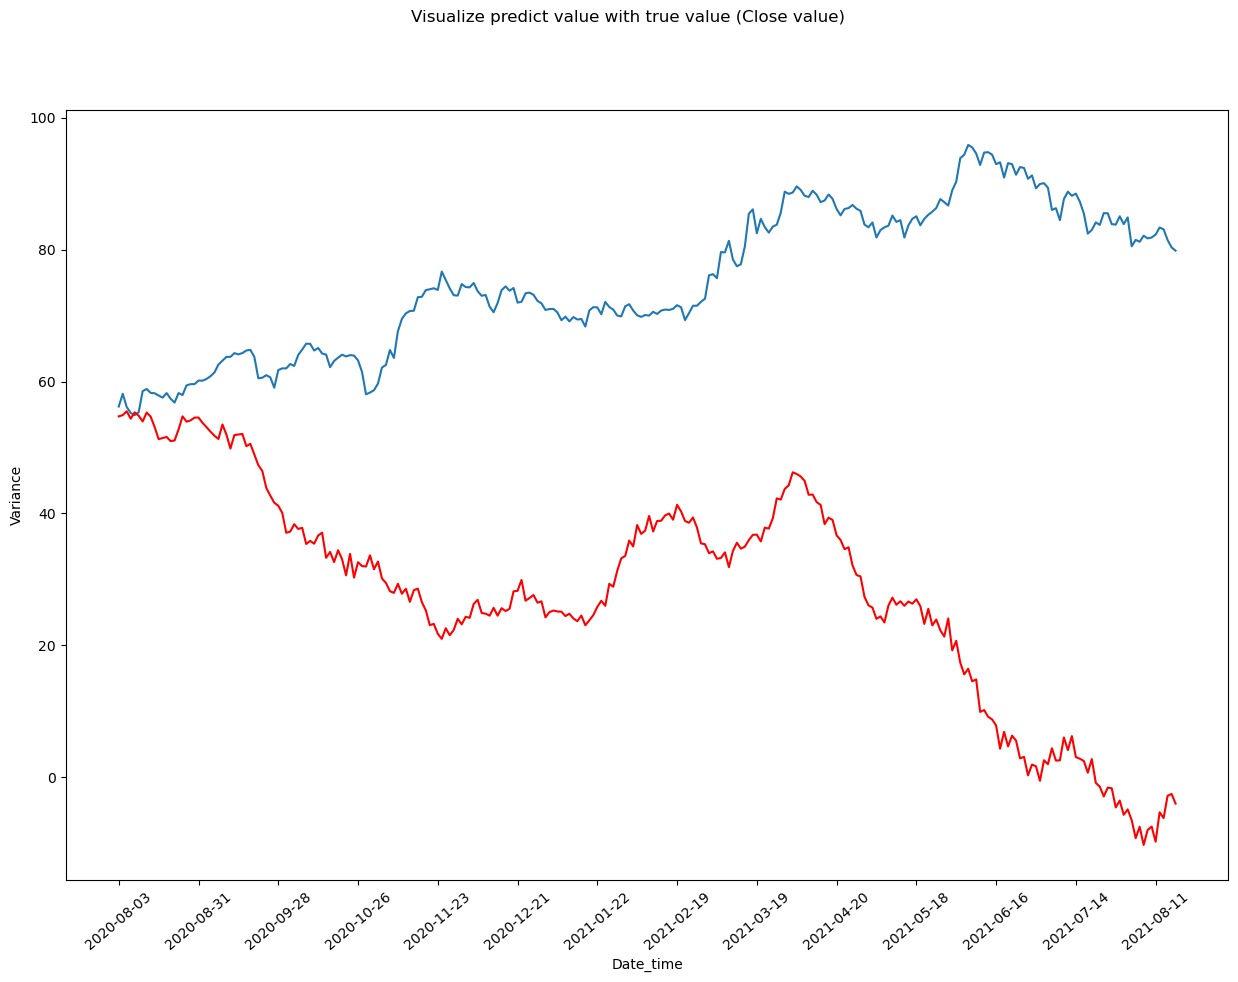

In [41]:
# Visualize predict value with true value
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.plot(df_BMW["Date"][1000:],y_test)
ax.plot(df_BMW["Date"][1000:],y_pred,color = 'red')
fig.suptitle("Visualize predict value with true value (Close value)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Variance")
ax.set_xticks(ax.get_xticks()[::20])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')
plt.show()

In [42]:
# Mean squared error:
from math import sqrt
print("Square root of MSE on test dataset:",sqrt(mean_squared_error(y_pred=y_pred.to_numpy(),y_true=y_test.to_numpy())))

Square root of MSE on test dataset: 53.243930068065616


## Preprocessing data before training model to see any improvements?
-   Scaling data (Min-Max scale, Standard Scale,...)